# Поширені прийоми генерації ознак. Математичні перетворення

In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('../datasets/mod_05_topic_10_various_data.pkl', 'rb') as fl:
    datasets = pickle.load(fl)

In [3]:
autos = datasets['autos']

autos['stroke_ratio'] = autos['stroke'] / autos['bore']

autos[['stroke', 'bore', 'stroke_ratio']].head()

,stroke,bore,stroke_ratio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776
3,3.40,3.19,1.065831
4,3.40,3.19,1.065831


<Axes: xlabel='LogWindSpeed', ylabel='Density'>

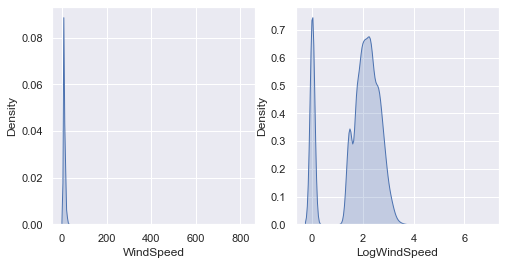

In [4]:
accidents = datasets['accidents']

accidents['LogWindSpeed'] = accidents['WindSpeed'].apply(np.log1p)

sns.set_theme()

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(accidents.WindSpeed, fill=True, ax=axs[0])
sns.kdeplot(accidents.LogWindSpeed, fill=True, ax=axs[1])

In [5]:
roadway_features = ['Amenity',
                    'Bump',
                    'Crossing',
                    'GiveWay',
                    'Junction',
                    'NoExit',
                    'Railway',
                    'Roundabout',
                    'Station',
                    'Stop',
                    'TrafficCalming',
                    'TrafficSignal']

accidents['RoadwayFeatures'] = accidents[roadway_features].sum(axis=1)

accidents[roadway_features + ['RoadwayFeatures']].head(10)

,Amenity,Bump,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,RoadwayFeatures
0,False,False,False,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,False,False,0
2,False,False,False,False,False,False,False,False,False,False,False,False,0
3,False,False,False,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,False,False,0
5,False,False,False,False,True,False,False,False,False,False,False,False,1
6,False,False,False,False,False,False,False,False,False,False,False,False,0
7,False,False,True,False,False,False,False,False,False,False,False,True,2
8,False,False,True,False,False,False,False,False,False,False,False,True,2
9,False,False,False,False,False,False,False,False,False,False,False,False,0


# Прийоми генерації ознак. Підрахунок кількості

In [6]:
concrete = datasets['concrete']

components = ['Cement',
              'BlastFurnaceSlag',
              'FlyAsh',
              'Water',
              'Superplasticizer',
              'CoarseAggregate',
              'FineAggregate']

concrete['Components'] = concrete[components].gt(0).sum(axis=1)

concrete[components + ['Components']].head(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
0,102.0,153.0,0.0,192.0,0.0,887.0,942.0,5
1,108.3,162.4,0.0,203.5,0.0,938.2,849.0,5
2,116.0,173.0,0.0,192.0,0.0,909.8,891.9,5
3,122.6,183.9,0.0,203.5,0.0,958.2,800.1,5
4,132.0,206.5,160.9,178.9,5.5,866.9,735.6,7
5,132.0,207.0,161.0,179.0,5.0,867.0,736.0,7
6,133.0,200.0,0.0,192.0,0.0,927.4,839.2,5
7,133.0,210.0,0.0,196.0,3.0,949.0,795.0,6
8,133.1,210.2,0.0,195.7,3.1,949.4,795.3,6
9,134.7,0.0,165.7,180.2,10.0,961.0,804.9,6


# Прийоми генерації ознак. Розділення й об'єднання текстових ознак

In [7]:
customer = datasets['customer']

customer[['Type', 'Level']] = (
    customer['Policy']
    .str
    .split(' ', expand=True))

customer[['Policy', 'Type', 'Level']].head(10)

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1
5,Personal L3,Personal,L3
6,Corporate L3,Corporate,L3
7,Corporate L3,Corporate,L3
8,Corporate L3,Corporate,L3
9,Special L2,Special,L2


In [8]:
autos['make_and_style'] = autos['make'] + '_' + autos['body_style']
autos[['make', 'body_style', 'make_and_style']].head()

,make,body_style,make_and_style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback
3,audi,sedan,audi_sedan
4,audi,sedan,audi_sedan


# Прийоми генерації ознак. Групові перетворення

In [9]:
customer['AverageIncome'] = (customer
                             .groupby('State')['Income']
                             .transform('mean'))

customer[['State', 'Income', 'AverageIncome']].head(10)

,State,Income,AverageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083
5,Oregon,62902,37557.283353
6,Oregon,55350,37557.283353
7,Arizona,0,37405.402231
8,Oregon,14072,37557.283353
9,Oregon,28812,37557.283353


In [10]:
customer = (customer
            .assign(StateFreq=lambda x:
                    x.groupby('State')['State']
                    .transform('count') /
                    x['State'].count()))

customer[['State', 'StateFreq']].head(10)

,State,StateFreq
0,Washington,0.087366
1,Arizona,0.186446
2,Nevada,0.096562
3,California,0.344865
4,Washington,0.087366
5,Oregon,0.284760
6,Oregon,0.284760
7,Arizona,0.186446
8,Oregon,0.284760
9,Oregon,0.284760


In [11]:
c_train = customer.sample(frac=0.75)
c_test = customer.drop(c_train.index)

c_train['AverageClaim'] = (c_train
                           .groupby('Coverage')['ClaimAmount']
                           .transform('mean'))

c_test = c_test.merge(
    c_train[['Coverage', 'AverageClaim']].drop_duplicates(),
    on='Coverage',
    how='left')

c_test[['Coverage', 'AverageClaim']].head(10)

,Coverage,AverageClaim
0,Basic,377.874433
1,Basic,377.874433
2,Premium,647.557320
3,Basic,377.874433
4,Basic,377.874433
5,Premium,647.557320
6,Basic,377.874433
7,Basic,377.874433
8,Basic,377.874433
9,Premium,647.557320


# Відбір ознак. Взаємна інформація між ознаками й цільовою змінною

<Axes: >

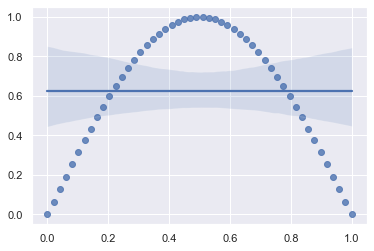

In [12]:
x = np.linspace(0, 1, 50)
y = np.sin(2 * np.pi * 0.5 * x)

sns.regplot(x=x, y=y)

In [13]:
mis = mutual_info_regression(x.reshape(-1, 1), y)[0]
cor = np.corrcoef(x, y)[0, 1]

print(f'MI score: {mis:.2f} | Cor index: {cor:.2f}')

MI score: 1.17 | Cor index: 0.00


In [14]:
X = autos.copy()
y = X.pop('price')

cat_features = X.select_dtypes('object').columns

for colname in cat_features:
    X[colname], _ = X[colname].factorize()

In [15]:
mi_scores = mutual_info_regression(
    X, y,
    discrete_features=X.columns.isin(
        cat_features.to_list() +
        ['num_of_doors',
         'num_of_cylinders']),
    random_state=42)

mi_scores = (pd.Series(
    mi_scores,
    name='MI Scores',
    index=X.columns)
    .sort_values())

mi_scores.sample(5)

d:\install\miniconda3\envs\env_mlf\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\install\miniconda3\envs\env_mlf\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


length            0.616900
drive_wheels      0.332490
make_and_style    0.510382
body_style        0.080485
wheel_base        0.578663
Name: MI Scores, dtype: float64

Text(0.5, 1.0, 'Mutual Information Scores')

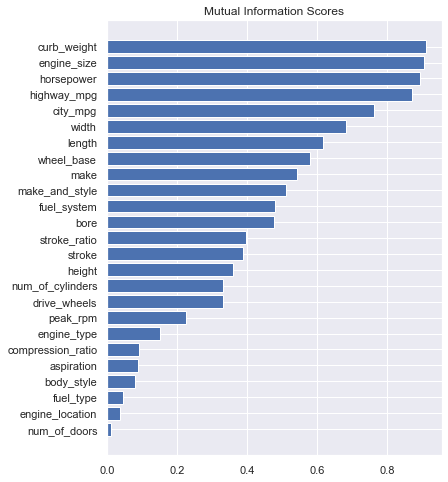

In [16]:
plt.figure(figsize=(6, 8))
plt.barh(np.arange(len(mi_scores)), mi_scores)
plt.yticks(np.arange(len(mi_scores)), mi_scores.index)
plt.title('Mutual Information Scores')

<Axes: xlabel='curb_weight', ylabel='price'>

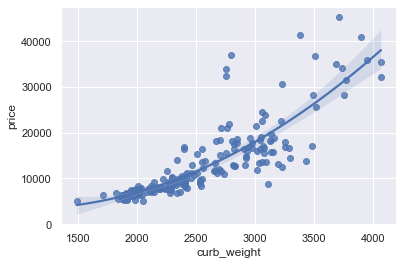

In [17]:
sns.regplot(data=autos, x='curb_weight', y='price', order=2)

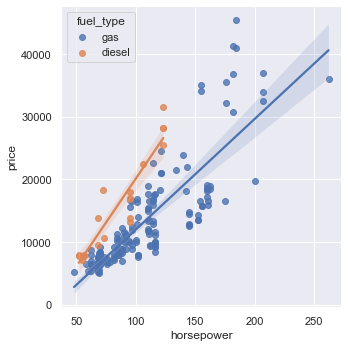

In [18]:
sns.lmplot(data=autos,
           x='horsepower',
           y='price',
           hue='fuel_type',
           facet_kws={'legend_out': False})